### identificando e removendo outliers

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))
dados = pd.read_csv('aluguel.csv', sep = ';')

<Axes: >

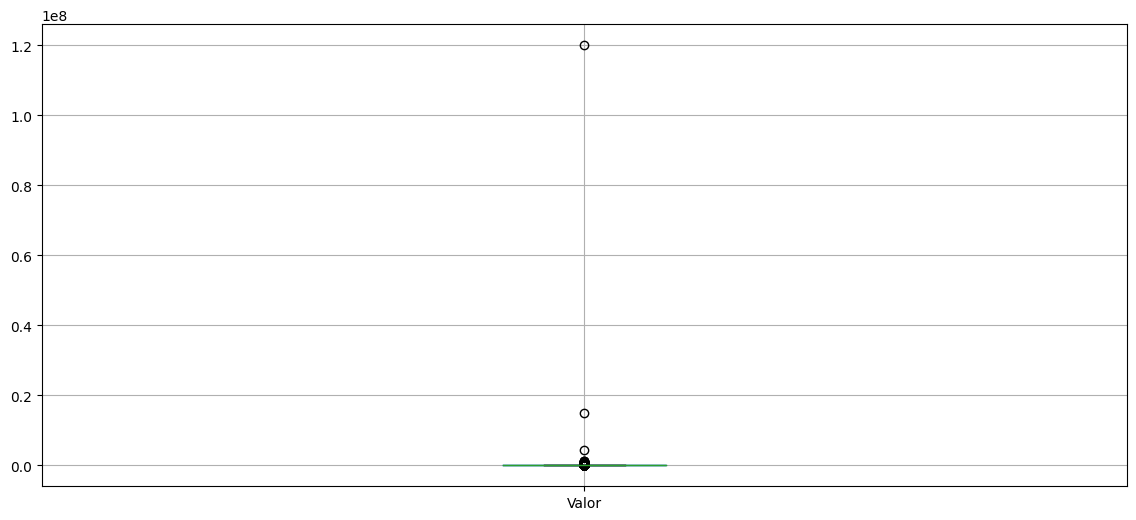

In [4]:
dados.boxplot(['Valor'])

In [5]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
826,Conjunto Comercial/Sala,Barra da Tijuca,0,0,0,5124,614000.0,NaN,NaN
884,Conjunto Comercial/Sala,Botafogo,0,56,0,4235,529375.0,114599.0,34345.0
1163,Conjunto Comercial/Sala,Cidade Nova,0,47,0,7357,514990.0,166709.0,14787.0
2722,Conjunto Comercial/Sala,Centro,0,15,0,5666,530000.0,1.0,1.0
2994,Prédio Inteiro,Barra da Tijuca,0,40,0,7500,600000.0,162000.0,13350.0
4595,Galpão/Depósito/Armazém,Irajá,0,5,0,1100,15000000.0,NaN,1000.0
4628,Prédio Inteiro,Centro,0,0,0,6986,560000.0,NaN,NaN
5565,Conjunto Comercial/Sala,Centro,0,30,0,4940,612550.0,128440.0,NaN
5592,Prédio Inteiro,Jacarepaguá,0,15,0,1200,120000000.0,NaN,10000.0
8067,Prédio Inteiro,Centro,0,90,0,7774,505310.0,NaN,NaN


In [6]:
valor = dados['Valor']

In [7]:
Q1 = valor.quantile(.25)

In [8]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [9]:
selecao = (valor >=limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

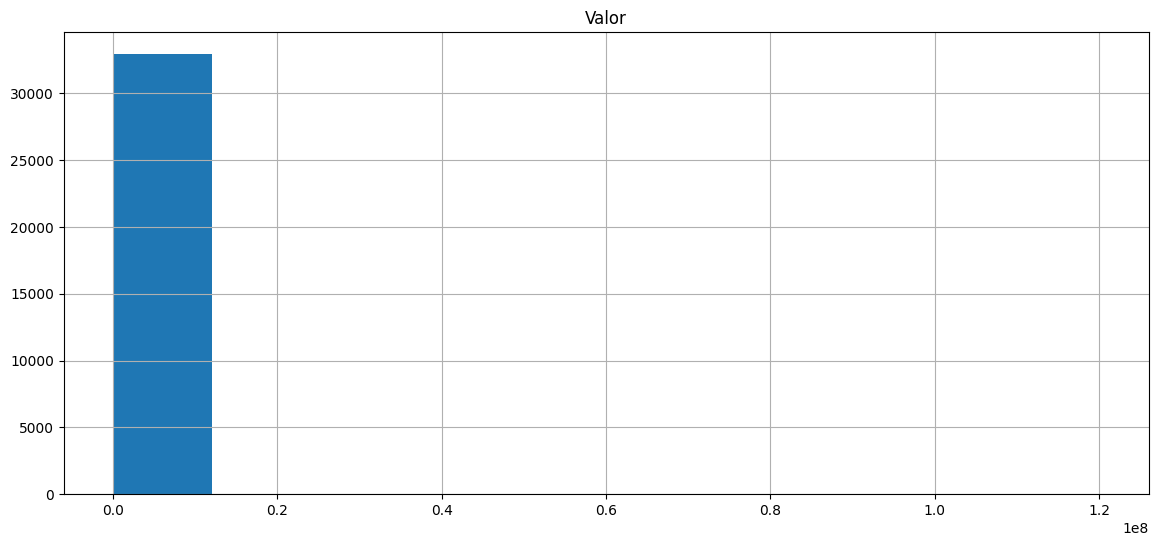

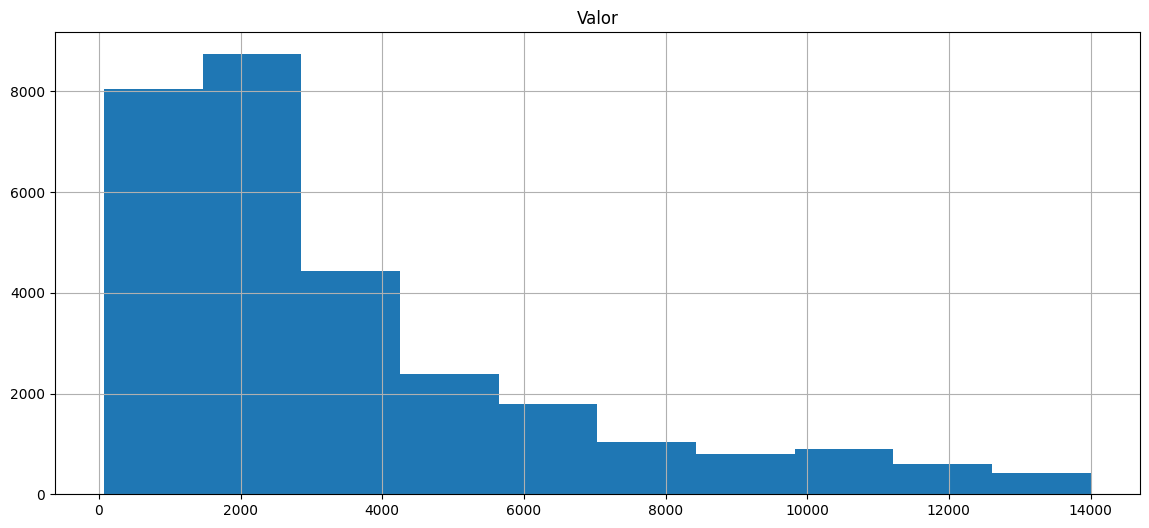

In [10]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

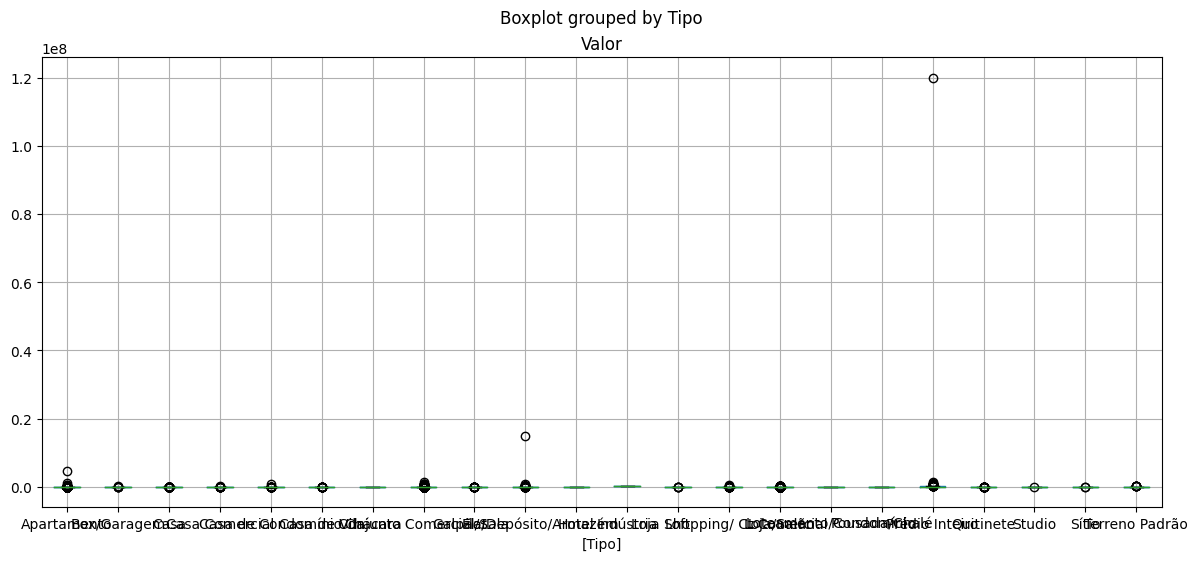

In [11]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [12]:
grupo_tipo = dados.groupby('Tipo')

In [13]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [14]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [15]:
limite_superior['Apartamento']

10100.0

In [16]:
for tipo in grupo_tipo.groups.keys():
    print(tipo)

Apartamento
Box/Garagem
Casa
Casa Comercial
Casa de Condomínio
Casa de Vila
Chácara
Conjunto Comercial/Sala
Flat
Galpão/Depósito/Armazém
Hotel
Indústria
Loft
Loja Shopping/ Ct Comercial
Loja/Salão
Loteamento/Condomínio
Pousada/Chalé
Prédio Inteiro
Quitinete
Studio
Sítio
Terreno Padrão


In [17]:
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados[selecao]

In [18]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

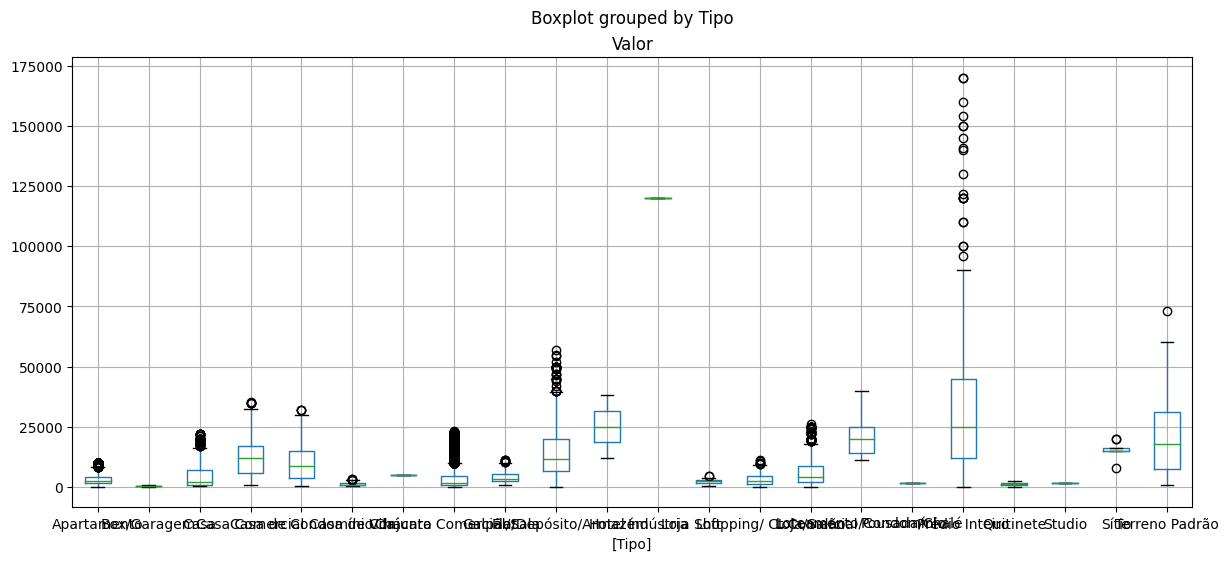

In [19]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [21]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)